## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Finding out where to merge the datasets
# mouse_metadata.head()
# study_results.head()
# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, on = "Mouse ID")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
mouse_study.shape

(1893, 8)

In [15]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    # could maybe group by mouse ID?
without_duplicates = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]
without_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
without_duplicates["Mouse ID"].nunique()
    # nunique in the grouped by data frame?

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen
    #maybe use df.numeric.describe()
mouse_mean = without_duplicates.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mouse_median = without_duplicates.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
mouse_variance = without_duplicates.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
mouse_sd = without_duplicates.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
mouse_SEM = without_duplicates.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    #groupby Drug Regimine
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
    # just do df["Tumor Volume (mm3)"].describe()
# Assemble the resulting series into a single summary dataframe.
    #set described data frame to be equal to the described df and then call the df
summary_mouse_data = pd.DataFrame({"mean": mouse_mean, "median": mouse_median, "variance": mouse_variance, 
                                   "standard deviation": mouse_sd, "SEM": mouse_SEM})
summary_mouse_data

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
    #call the previous df?
# Using the aggregation method, produce the same summary statistics in a single line
    # df.agg{ par1: ["col1", "col2", etc], par2: ["col1", "col2", etc]}
summary_df = without_duplicates.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var',
                                                                                   'std', 'sem'] })
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# summary_df.plot()
regimen_count = without_duplicates.groupby("Drug Regimen").count()["Mouse ID"]
regimen_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Mice Count')

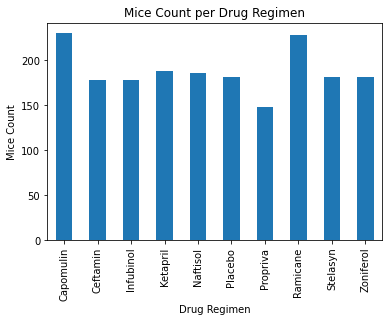

In [32]:
type(regimen_count)
regimen_count.plot(kind= "bar", title = "Mice Count per Drug Regimen")
plt.ylabel("Mice Count")

<BarContainer object of 10 artists>

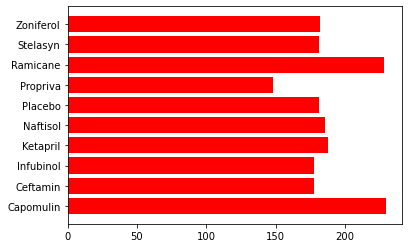

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plt.plot(summary_df)
plt.barh(regimen_count.index, regimen_count, color = "red")

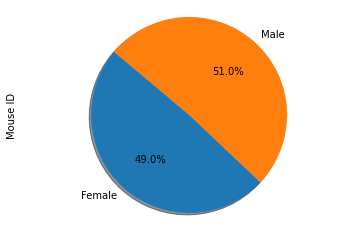

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
amount_gender = without_duplicates.groupby("Sex").count()["Mouse ID"]
# amount_gender
amount_gender.plot(kind= "pie", autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal");

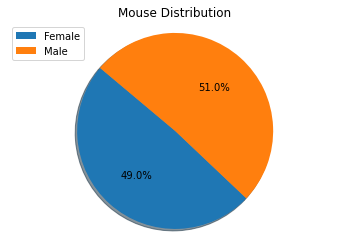

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(amount_gender, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.legend(amount_gender.index, loc = "best")
plt.title("Mouse Distribution")
plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = without_duplicates.groupby("Mouse ID").max()["Timepoint"]
last_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(last_timepoint, without_duplicates, on = ['Mouse ID', 'Timepoint'])
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for treatment in treatments:
    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    specific_mice = merge_df.loc[merge_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(specific_mice)
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
